In [1]:
import sys

sys.path.append('../')

from model_v2 import  *
from data import *
import os
import keras
import cv2
from keras.callbacks import TensorBoard
import tensorflow as tf
import keras.backend.tensorflow_backend as K
import matplotlib.pyplot as plt

from utils import utils
from utils import helpers

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

Using TensorFlow backend.


In [2]:
train_path = "../640x400_small"
image_folder = "train"
label_folder = "trainannot"
valid_path =  "../640x400_small"
valid_image_folder ="val"
valid_label_folder = "valannot"
test_path = '../640x400_small/test/'
log_filepath = '../log'
flag_multi_class = True
num_classes = 4

dp = data_preprocess(
    train_path=train_path,image_folder=image_folder,label_folder=label_folder,
    valid_path=valid_path,valid_image_folder=valid_image_folder,valid_label_folder=valid_label_folder,
    flag_multi_class=flag_multi_class, num_classes=num_classes, 
    test_path=test_path, img_rows=640, img_cols=400, csv_name='class_dict.csv'
)

# train your own model
train_data = dp.trainGenerator(batch_size=5)
valid_data = dp.validLoad(batch_size=5)
test_data = dp.testGenerator()

In [3]:
model = unet(num_class=4, input_size=(640, 400, 3))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 640, 400, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 640, 400, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 640, 400, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxP

In [4]:
tb_cb = TensorBoard(log_dir=log_filepath)
model_checkpoint = keras.callbacks.ModelCheckpoint(
    '../model/Opends_model_v1.hdf5', monitor='val_loss', verbose=1, save_best_only=True
)

history = model.fit_generator(
    train_data,
    steps_per_epoch=100, epochs=10,
    validation_steps=1,
    validation_data=valid_data,
    callbacks=[model_checkpoint, tb_cb]
)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/10
Found 421 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 421 images belonging to 1 classes.
100/100 [==============================] - 113s 1s/step - loss: 0.6144 - acc: 0.8294 - val_loss: 0.8012 - val_acc: 0.8427

Epoch 00001: val_loss improved from inf to 0.80120, saving model to ../model/Opends_model_v1.hdf5
Epoch 2/10
100/100 [==============================] - 107s 1s/step - loss: 0.5134 - acc: 0.8466 - val_loss: 0.5932 - val_acc: 0.8592

Epoch 00002: val_loss improved from 0.80120 to 0.59317, saving model to ../model/Opends_model_v1.hdf5
Epoch 3/10
100/100 [==============================] - 107s 1s/step - loss: 0.4259 - acc: 0.8443 - val_loss: 0.4700 - val_acc: 0.8458

Epoch 00003: val_loss improved from 0.59317 to 0.47004, saving model to ../model/Opends_model_v1.hdf5
Epoch 

In [5]:
img = next(dp.testGenerator())
img.shape

(1, 640, 400, 3)

In [6]:
pred = model.predict(img)
pred.shape

(1, 640, 400, 4)

In [7]:
np.unique(pred)

array([5.8629064e-16, 6.0881345e-16, 6.1109817e-16, ..., 9.9998355e-01,
       9.9998391e-01, 9.9998438e-01], dtype=float32)

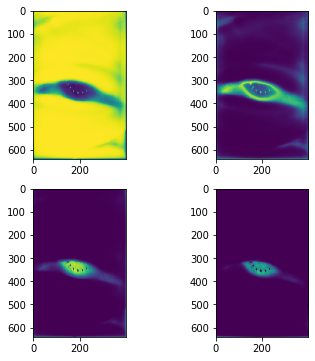

In [8]:
fig = plt.figure(figsize=(6, 6))
sub1 = plt.subplot(2, 2, 1)
sub1.imshow(pred[0, :, :, 0])

sub2 = plt.subplot(2, 2, 2)
sub2.imshow(pred[0, :, :, 1])

sub3 = plt.subplot(2, 2, 3)
sub3.imshow(pred[0, :, :, 2])

sub4 = plt.subplot(2, 2, 4)
sub4.imshow(pred[0, :, :, 3])

plt.show()

In [9]:
reverse_oh = helpers.reverse_one_hot(pred[0])
rev_oh_color = helpers.colour_code_segmentation(reverse_oh, dp.label_values)
rev_oh_color.shape

(640, 400, 3)

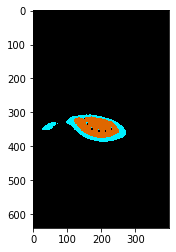

In [10]:
plt.imshow(rev_oh_color)

In [11]:
import time, datetime

img = next(dp.testGenerator())
img = next(dp.testGenerator())

In [12]:
st = time.time()
model.predict(img)
final = time.time() - st

In [13]:
print('Time = %.2f' % (final))

Time = 0.06
